<a href="https://colab.research.google.com/github/vasiliyeskin/MachineLearningExperiences/blob/master/Deep-Reinforcement-Learning-Hands-On/Chapter02/lunarSimulationOnColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Взято с 
https://davidrpugh.github.io/stochastic-expatriate-descent/openai/binder/google-colab/2020/04/16/remote-rendering-gym-envs.html

In [ ]:
!apt-get install -y xvfb x11-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.4).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!pip install pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

In [ ]:
!pip install gym[box2d]==0.17.* 

In [ ]:
!echo $DISPLAY

:1005


In [ ]:
import pyvirtualdisplay


_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()

In [ ]:
!echo $DISPLAY

:1009


In [ ]:
import typing

import numpy as np


# represent states as arrays and actions as ints
State = np.array
Action = int

# agent is just a function! 
Agent = typing.Callable[[State], Action]


def uniform_random_policy(state: State,
                          number_actions: int,
                          random_state: np.random.RandomState) -> Action:
    """Select an action at random from the set of feasible actions."""
    feasible_actions = np.arange(number_actions)
    probs = np.ones(number_actions) / number_actions
    action = random_state.choice(feasible_actions, p=probs)
    return action


def make_random_agent(number_actions: int,
                      random_state: np.random.RandomState = None) -> Agent:
    """Factory for creating an Agent."""
    _random_state = np.random.RandomState() if random_state is None else random_state
    return lambda state: uniform_random_policy(state, number_actions, _random_state)

In [ ]:
import gym
import matplotlib.pyplot as plt
from IPython import display


def simulate(agent: Agent, env: gym.Env) -> None:
    state = env.reset()
    img = plt.imshow(env.render(mode='rgb_array'))
    done = False
    while not done:
        action = agent(state)
        img.set_data(env.render(mode='rgb_array')) 
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, done, _ = env.step(action)       
    env.close()

In [ ]:
lunar_lander_v2 = gym.make('LunarLander-v2')
lunar_lander_v2 = gym.wrappers.Monitor(lunar_lander_v2, "recording", force=True)
_ = lunar_lander_v2.seed(42)

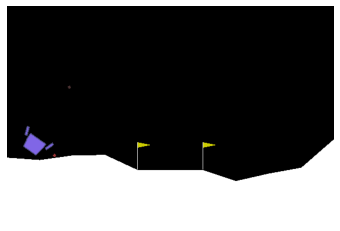

In [ ]:
random_agent = make_random_agent(lunar_lander_v2.action_space.n, random_state=None)
simulate(random_agent, lunar_lander_v2)